###  TITANIC DISASTER

In [1]:
#import all the necessary libraries

import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Importing the Data

train=pd.read_csv('C://Users//mohit//Downloads//Mohit Data Science//Kaggle//Titanic//Data//train.csv')
test=pd.read_csv('C://Users//mohit//Downloads//Mohit Data Science//Kaggle//Titanic//Data//test.csv')
gender_submission=pd.read_csv('C://Users//mohit//Downloads//Mohit Data Science//Kaggle//Titanic//Data//gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
percent_missing = (train.isnull().sum() / train.isnull().count()*100).sort_values(ascending = False)
percent_missing

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

In [7]:
#Let's drop Columns with more than 50% missing values

train.drop('Cabin',axis=1,inplace=True)

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
44.00     9
48.00     9
54.00     8
9.00      8
1.00      7
51.00     7
52.00     6
14.00     6
3.00      6
49.00     6
41.00     6
37.00     6
15.00     5
43.00     5
58.00     5
11.00     4
62.00     4
60.00     4
8.00      4
56.00     4
5.00      4
46.00     3
65.00     3
7.00      3
6.00      3
61.00     3
55.00     2
28.50     2
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.5

In [11]:
train['Age'].fillna((train['Age'].mean()),inplace=True) # filling missing values with mean of age column

In [12]:
percent_missing = (train.isnull().sum() / train.isnull().count()*100).sort_values(ascending = False)
percent_missing   # checking missing values wr columns

Embarked       0.224467
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Age            0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

In [13]:
train['Embarked'].value_counts()  # checking embarked column

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
# Replacing missing values with the majority one and then later on will be removing that while making dummy variables 
train['Embarked'] = train['Embarked'].replace(np.nan, 'S')  

In [15]:
percent_missing = (train.isnull().sum() / train.isnull().count()*100).sort_values(ascending = False)
percent_missing

Embarked       0.0
Fare           0.0
Ticket         0.0
Parch          0.0
SibSp          0.0
Age            0.0
Sex            0.0
Name           0.0
Pclass         0.0
Survived       0.0
PassengerId    0.0
dtype: float64

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [17]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


   ## EDA

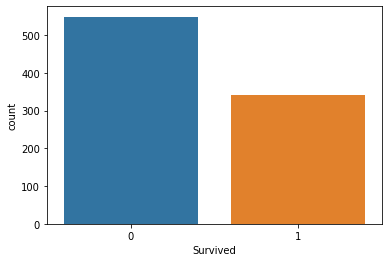

In [18]:
sns.countplot('Survived',data=train)  # Survived column will act as our target variable where 0 means didnot survive and 1 means survived

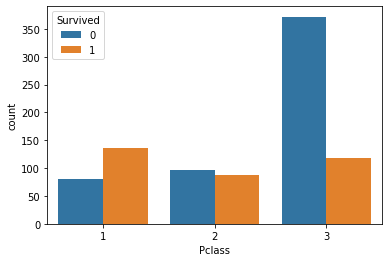

In [19]:
sns.countplot('Pclass',hue='Survived',data=train)  #impaact of Pclass on survived column

#### Most of Passenger in P class 3 died



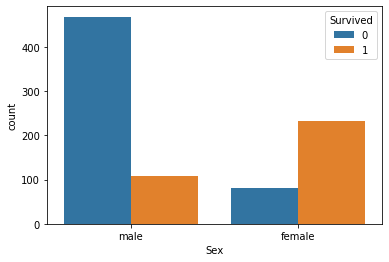

In [20]:
sns.countplot('Sex',hue='Survived',data=train) # Impact of Gender on Survived

#### more than 400 males died and around 100 females
#### around 100 males survived and 250 females survived


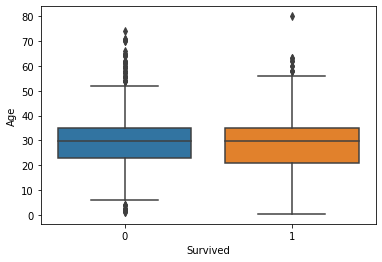

In [21]:
sns.boxplot(y='Age',x='Survived',data=train) # impact of Age on Survived 

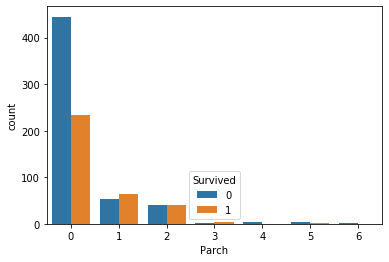

In [22]:
sns.countplot('Parch',hue='Survived',data=train) # impact of Parch on Survived 

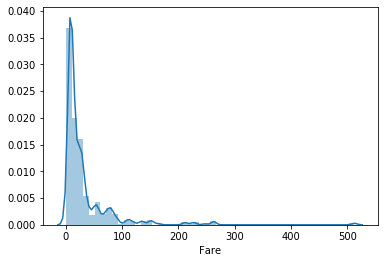

In [23]:
sns.distplot(train['Fare'])

In [24]:
#Median is quite same for both who survived and didn't survived
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
# List of variables to map

varlist =  ['Sex']

# Defining the map function
def binary_map(x):
    return x.map({'male': 1, "female": 0})

# Applying the function to the housing list
train[varlist] = train[varlist].apply(binary_map)

In [26]:
train2=train.drop(['Name','Ticket'],axis=1) 

In [27]:
train2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [28]:
dummy1=pd.get_dummies(train2['Embarked'],prefix='Embarked') # dummy varaible Embarked
train2=pd.concat([train2,dummy1],axis=1)

In [29]:
train2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,S,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,C,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,S,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,S,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,S,0,0,1


In [30]:
train2.drop(['Embarked','Embarked_S'],axis=1,inplace=True)

In [31]:
X=train2.drop(['Survived','PassengerId'],axis=1) # removing duplicate columns

In [32]:
y=train2['Survived']

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()  # standardizing the continous columns
 
X[['Age','Fare']] = scaler.fit_transform(X[['Age','Fare']])

X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q
0,3,1,-0.592481,1,0,-0.502445,0,0
1,1,0,0.638789,1,0,0.786845,1,0
2,3,0,-0.284663,0,0,-0.488854,0,0
3,1,0,0.407926,1,0,0.420730,0,0
4,3,1,0.407926,0,0,-0.486337,0,0


In [35]:
from sklearn.linear_model import LogisticRegression  #performing logistic regression on model


In [36]:
model = LogisticRegression(random_state=0)
model.fit(X, y)
predictions = model.predict(X)
print(predictions)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0
 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0
 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1
 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0
 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1
 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 

### Now doing same on test data 

In [37]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
percent_missing = (test.isnull().sum() / test.isnull().count()*100).sort_values(ascending = False)
percent_missing

Cabin          78.229665
Age            20.574163
Fare            0.239234
Embarked        0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
PassengerId     0.000000
dtype: float64

In [39]:
test.drop('Cabin',axis=1,inplace=True)

In [40]:
test['Age'].fillna((test['Age'].mean()),inplace=True)

In [41]:
test['Fare'].fillna((test['Fare'].mean()),inplace=True)

In [42]:
percent_missing = (test.isnull().sum() / test.isnull().count()*100).sort_values(ascending = False)
percent_missing

Embarked       0.0
Fare           0.0
Ticket         0.0
Parch          0.0
SibSp          0.0
Age            0.0
Sex            0.0
Name           0.0
Pclass         0.0
PassengerId    0.0
dtype: float64

In [43]:
# List of variables to map

varlist =  ['Sex']

# Defining the map function
def binary_map(x):
    return x.map({'male': 1, "female": 0})

# Applying the function to the housing list
test[varlist] = test[varlist].apply(binary_map)

In [44]:
test2=test.drop(['Name','Ticket'],axis=1)

In [45]:
dummy1=pd.get_dummies(test2['Embarked'],prefix='Embarked')
test2=pd.concat([test2,dummy1],axis=1)

In [46]:
test2.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34.5,0,0,7.8292,Q,0,1,0
1,893,3,0,47.0,1,0,7.0000,S,0,0,1
2,894,2,1,62.0,0,0,9.6875,Q,0,1,0
3,895,3,1,27.0,0,0,8.6625,S,0,0,1
4,896,3,0,22.0,1,1,12.2875,S,0,0,1


In [47]:
test2.drop(['Embarked','Embarked_S'],axis=1,inplace=True)

In [48]:
new_X=test2.drop(['PassengerId'],axis=1)

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

new_X[['Age','Fare']] = scaler.fit_transform(new_X[['Age','Fare']])

new_X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q
0,3,1,0.334993,0,0,-0.498407,0,1
1,3,0,1.325530,1,0,-0.513274,0,0
2,2,1,2.514175,0,0,-0.465088,0,1
3,3,1,-0.259330,0,0,-0.483466,0,0
4,3,0,-0.655545,1,1,-0.418471,0,0


In [51]:

new_model = LogisticRegression(random_state=0)
new_model.fit(X, y)
new_predictions = model.predict(new_X)
print(new_predictions)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [52]:
test_final = pd.DataFrame({'PassengerId': [], 'Survived': []})
test_final['PassengerId'] = test['PassengerId']
test_final['Survived'] = new_predictions

In [53]:
test_final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [54]:
test_final.shape

(418, 2)